# ПРОДВИНУТЫЕ ТЕМЫ PANDAS И ЗАДАНИЯ СО ЗВЁЗДОЧКОЙ

## Shape of data, или работа с таблицами

В предыдущих уроках вы уже познакомились с базовыми методами работы с таблицами (например, `pivot`) и встретились с иерархическими индексами (мультииндексами). Поначалу они могут выглядеть как что-то страшное и непонятное, от чего хочется поскорее избавиться. Но всё не так плохо! В pandas есть ряд полезных методов, которые упрощают работу с подобными индексами, а также позволяют с легкостью приводить данные к нужному формату. 

Начнем с методов `stack` и `unstack`, которые очень похожи на `pivot()`, и предназначены для работы с `MultiIndex`.

### stack

`Stack` - помещает уровень столбцов в уровни индекса строк. Результирующий объект – `Series`.

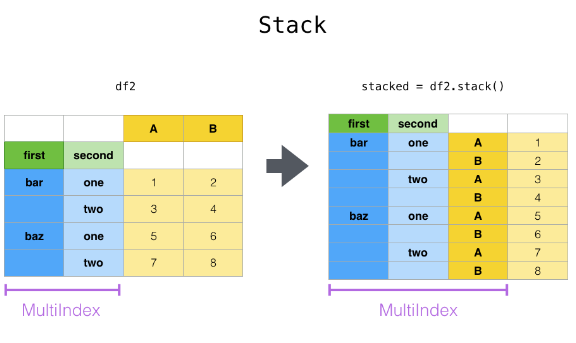

В качестве аргументов `stack` можно передать два параметра.

- `level` – отвечает за уровень, по которому будет проведена стыковка  
- `dropna` - нужно ли убрать ряды с пропущенными значениями

### unstack

`Unstack` (расстыковка) - операция, противоположная `stack`, которая помещает уровень индекса строк в уровень оси столбцов.

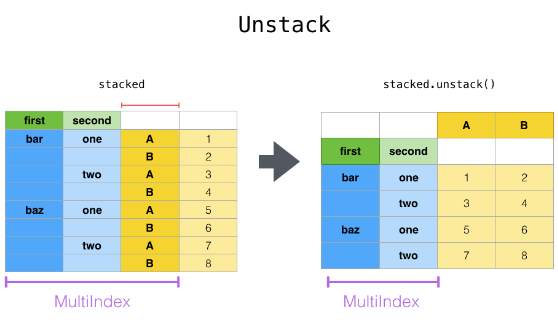

Один из аргументов метода — `level`, отвечает за уровень, по которому будет проведена расстыковка. Можно передать как число, так и название уровня индексов, если таковое имеется.

### 1

Теперь задача. В этот раз никаких такси и товаров, потренируемся на характеристиках покемонов! В исходном датасете мультииндексов нет, поэтому будем создавать их сами.

Сначала измените названия исходных столбцов:

- пробелы и точки нужно заменить на "_" (напр. Sp. Atk → sp_atk)  
- приведите все названия к нижнему регистру  
- колонку "#" переименовать в "id"  

Полученные результаты запишите в исходный датафрейм `pokemon`.

Затем сгруппируйте данные по поколению покемонов (`generation`), и с помощью `value_counts()` посчитайте, сколько в каком поколении легендарных покемонов (`legendary`), а также сколько в этих поколениях нелегендарных покемонов. Полученный объект приведите к формату датафрейма (`.to_frame()`) и сохраните в `legends`.

In [3]:
import pandas as pd

In [4]:
pokemon = pd.read_csv('Pokemon.csv')

In [5]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
pokemon.rename(columns=lambda x: x.replace(' .', '_').replace(' ', '_').lower(), inplace=True)

In [11]:
pokemon.rename(columns={'#': 'id'}, inplace=True)

In [12]:
pokemon

,id,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [14]:
legends = pokemon.groupby('generation').legendary.value_counts().to_frame()

In [15]:
legends

legendary
generation legendary           
1          False            160
           True               6
2          False            101
           True               5
3          False            142
           True              18
4          False            108
           True              13
5          False            150
           True              15
6          False             74
           True               8

### 2

Как вы могли заметить,  есть только одна колонка со значениями, которая называется `legendary`, а в качестве индекса используются две колонки — `generation` и `legendary`. Два одинаковых названия — не очень хорошо, поэтому необходимо переименовать колонку `legendary` в `legendary_count`. 

Используйте датафрейм `legends`, полученный на предыдущем шаге, и измените в нём название столбца, перезаписав его в ту же переменную. Затем используйте `unstack`, чтобы поместить уровень индекса `legendary` в уровень оси столбцов. Иными словами, должно получиться две колонки – `False` & `True`. Результат сохраните в `legends_unstacked`.

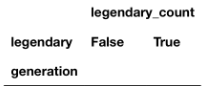

In [18]:
legends.rename(columns={'legendary': 'legendary_count'}, inplace=True)

In [20]:
legends.unstack()

legendary_count     
legendary            False True
generation                     
1                      160    6
2                      101    5
3                      142   18
4                      108   13
5                      150   15
6                       74    8

### 3

Немного усложним задачу. Теперь попробуем узнать, среди каких типов покемонов и какого поколения больше всего легендарных.

Сгруппируйте датасет `pokemon` по переменным `generation` и `type_1`, посчитайте количество легендарных покемонов внутри групп. Приведите данные в формат датафрейма, а затем используйте `unstack()`. В качестве ответа выберите вид и поколение покемона, среди которых больше всего легендарных.

- Water 1 поколения  
- Dragon 5 поколения  
- __Dragon 3 поколения__    
- Normal 5 поколения

In [27]:
pokemon.groupby(['generation', 'type_1']).legendary.value_counts().unstack().idxmax()

legendary
False     (1, Water)
True     (3, Dragon)
dtype: object

### Широкий и длинный формат
### melt

### 4

С помощью метода `melt` можно "расплавить" данные и привести их к длинному формату. Так, одна или несколько колонок помещаются в качестве идентификационных переменных, а остальные столбцы считаются измеряемыми переменными. Их названия и значения помещаются в колонки `variable` и `value`.

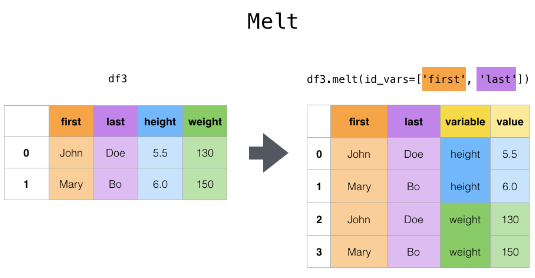

Преобразуйте представленные данные в длинный формат и запишите в переменную `avocado_agg_long`. В качестве индекса используйте `type`

In [28]:
avocado_agg = pd.DataFrame({'type' : ['conventional', 'organic'],
                            'AvgPrice_2015' : [1.077963, 1.673324],
                            'AvgPrice_2016' : [1.105595, 1.571684],
                            'AvgPrice_2017' : [1.294888, 1.735521],
                            'AvgPrice_2018' : [1.127886, 1.567176],
                            })
avocado_agg

,type,AvgPrice_2015,AvgPrice_2016,AvgPrice_2017,AvgPrice_2018
0,conventional,1.077963,1.105595,1.294888,1.127886
1,organic,1.673324,1.571684,1.735521,1.567176


In [29]:
avocado_agg_long = pd.wide_to_long(avocado_agg, stubnames='AvgPrice', i='type', j='year', sep='_')

In [30]:
avocado_agg_long

,,AvgPrice
type,year,
conventional,2015,1.077963
organic,2015,1.673324
conventional,2016,1.105595
organic,2016,1.571684
conventional,2017,1.294888
organic,2017,1.735521
conventional,2018,1.127886
organic,2018,1.567176


### ★ 5

Имеется набор данных о супергероях в широком формате. В первой колонке `Name` находятся их имена, а остальные 167 столбцов — различные характеристики (суперсилы), принимающие значение либо True, либо False. Давайте преобразуем датафрейм так, чтобы "собрать" эти признаки в один столбец под названием `superpower`, а в качестве значений поместить туда списки имеющихся у того или иного героя суперсил. 

То есть привести в следующий формат:

In [ ]:
           Name                                         superpower
568  Spider-Man  [Reflexes, Animal Oriented Powers, Danger Sens...

Сначала приведите данные к длинному формату, где единственным идентификатором будет имя героя `Name`. Новый столбец с названиями суперсил переименуйте в `superpower`. Полученный датафрейм запишите в `superheroes_long`.

Для того, чтобы соединить силы в списки и привести данные в желаемую форму, отфильтруйте колонку `value` так, чтобы остались строки только со значением True. Сгруппируйте датасет по `Name`, после чего возьмите столбец `superpower` и используйте `.apply(list)`. Результат сохраните в `superheroes_powers`. Обратите внимание, что результирующий объект тоже должен быть датафреймом, а колонки должно быть всего две — `Name` и `superpower`.

In [44]:
superheroes = pd.read_csv('superheroes_power_matrix.csv')

In [45]:
superheroes_long = superheroes.melt(id_vars=['Name'], var_name='superpower')

In [46]:
superheroes_powers = superheroes_long.query('value == True') \
                                     .groupby('Name') \
                                     .superpower \
                                     .apply(list) \
                                     .to_frame() \
                                     .reset_index()

In [47]:
superheroes_powers

,Name,superpower
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."
